In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.font_manager
import random 
from matplotlib import rcParams, cm
import scipy.stats as ss
import h5py
import glob
import seaborn as sns
import time
import os
import itertools
import timeit
import networkx as nx
import collections 
import scipy.io
from matplotlib import gridspec 
#For ROI Maps
from scipy.io import loadmat
from skimage import measure
from scipy import ndimage

#For Fitting Baselines
from scipy.optimize import curve_fit

#For Clustering
from sklearn.cluster.bicluster import SpectralBiclustering

In [188]:
%matplotlib inline

In [189]:
#matplotlib.font_manager._rebuild()
#Set matplotlib fonts for figures
rcParams['font.family'] = 'Arial'

## Last day of training/extinction 

In [190]:
def makeAliFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    if m_day == 2:
                        filenames[mouse_dir] = 'trace_kyleFinalwDoughnut_AllBGs_BinaryVideo.hdf5'
                         
                    else:
                        filenames[mouse_dir] = 'trace_matched_final_BinaryVideo.hdf5'
    return directories, filenames

In [191]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces_final.h5'
                   
    return directories, filenames

In [192]:
def makeRebeccaFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                if m_day == 1:
                    filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
                else:
                    filenames[mouse_dir] = 'trace_final_BinaryVideo.hdf5'
                #filenames[mouse_dir] = 'trace_final_BinaryVideo.hdf5'
    return directories, filenames

In [193]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces_final.h5'
    return directories, filenames

In [194]:
def combineFilenames(base, dirs, fnDict):
    #Combine Filenames into list for multiple directories with a common base.  fnDict is a dictionary of the filename for each directory
    outFiles = []
    for d in dirs:
        outFiles.append(os.path.join(base+d+fnDict[d]))
    return outFiles

In [195]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24, 25, 26], [2,5], [1,2])
aliFolders, aliFilenames = makeAliFilenames(aliMice, aliDays, aliSessions)
aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'

rMice, rDays, rSessions = ([2982,4540], [1,9], [1])
rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [1,5], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
allFiles = aliFiles + rFiles + nrFiles
print(allFiles)

['/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d2_s1/trace_kyleFinalwDoughnut_AllBGs_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d5_s1/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d5_s2/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d2_s1/trace_kyleFinalwDoughnut_AllBGs_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d5_s1/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d5_s2/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d2_s1/trace_kyleFinalwDoughnut_AllBGs_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d5_s1/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d5_s2/trace_matched_final_BinaryVideo.hdf5', 

### Load behavior data 

In [196]:
def loadFiles(allFiles, fieldName, whichData=None, multiIndex=False, fixedSize=None):
    #Get File Inputs
    firstf = allFiles[0]
    firstdir = firstf.split('/')[-2]
    f = h5py.File(firstf, 'r')
    if multiIndex: #Adjust indexing for first DataFrame if using a multi-index
        first_array = np.array(f[fieldName]).T
        index_iterables = [[firstdir], range(first_array.shape[1])]
        index = pd.MultiIndex.from_product(index_iterables, names=['mouse','cell_num'])
        df = pd.DataFrame(data=first_array, columns=index)
    else:
        if fixedSize == None:
            df = pd.DataFrame(data=np.array(f[fieldName]).T, columns=[firstdir])
        else:
            df = pd.DataFrame(data=np.array(f[fieldName]).T[:(fixedSize)], columns=[firstdir])
    
    df.index.name='Time'
    df_size = df.shape[0] #Determine Size of DataFrame
    for f in allFiles[1:]: #Loop through remaining files and add to DataFrame
        fdir = f.split('/')[-2] #Current Filename/Dir
        f = h5py.File(f, 'r')
        if multiIndex: #Iteratively add multiIndexed DataFrames
            data_arr = np.array(f[fieldName]).T
            index_iterables = [[fdir], range(data_arr.shape[1])]
            index = pd.MultiIndex.from_product(index_iterables, names=['mouse', 'cell_num'])
            df = df.join(pd.DataFrame(data=data_arr, columns=index))
        else:
            #print(f)
            #print(df.shape)
            #print(df_size)
            #print(np.array(f[fieldName]).T.shape)
            try: #Standard Loading
                df.loc[:,fdir] = np.array(f[fieldName]).T 
            except ValueError: #Exception cases where behavior was different size from other behavior sessions
                if (whichData == 'Ali'): #Ali26_d5_s2 and Ali25_d5_s2 are one frame short
                    df.loc[:,fdir] = np.insert(np.array(f[fieldName]).T, 0, np.array(f[fieldName]).T.mean())
                elif np.array(f[fieldName]).T.shape[0]<df_size:
                    temp = np.array(f[fieldName]).T
                    df.loc[:,fdir] = np.append(temp, temp.mean().reshape(1,-1), axis=0)
                elif (whichData == 'Rebecca'): #2982_d9_s1 is one frame longer
                    new_size = np.array(f[fieldName]).shape[1]
                    diff_size = abs(new_size-df_size)
                    df.loc[:,fdir] = np.array(f[fieldName]).T[:-diff_size]
    drop_index = df.index[df.isna().any(axis='columns')]
    df = df.drop(drop_index)
    return df

In [197]:
aliSounds = loadFiles(aliFiles, 'binSounds', whichData='Ali')
rSounds = loadFiles(rFiles, 'binSounds', whichData='Rebecca')
nrSounds = loadFiles(nrFiles, 'binSounds', whichData='Rebecca', fixedSize=39500)
sound_traces = pd.concat([aliSounds,rSounds,nrSounds], axis=1)

In [198]:
aliPuffs = loadFiles(aliFiles, 'binPuffs', whichData='Ali')
rPuffs = loadFiles(rFiles, 'binPuffs', whichData='Rebecca')
nrPuffs = loadFiles(nrFiles, 'binPuffs', whichData='Rebecca', fixedSize=39500)
puff_traces = pd.concat([aliPuffs,rPuffs,nrPuffs], axis=1)

In [84]:
aliTrials = loadFiles(aliFiles, 'binTrials', whichData='Ali')
rTrials = loadFiles(rFiles, 'binTrials', whichData='Rebecca')
nrTrials = loadFiles(nrFiles, 'binTrials', whichData='Rebecca', fixedSize=39500)
trial_traces = pd.concat([aliTrials,rTrials,nrTrials], axis=1)

In [14]:
aliEyeTraces = loadFiles(aliFiles, 'eyeTrace', whichData='Ali')
rEyeTraces = loadFiles(rFiles, 'eyeTrace', whichData='Rebecca')
nrEyeTraces = loadFiles(nrFiles, 'eyeTrace', whichData='Rebecca', fixedSize=39500)
eye_traces = pd.concat([aliEyeTraces,rEyeTraces,nrEyeTraces], axis=1)

In [15]:
def linear_func(x, a, b):
    return a*x + b

In [16]:
def curve_fit_wrapper(y, x, func):
    #Wrap curve_fit to match Pandas DataFrame Use and return only parameters, not covariance
    return curve_fit(func, x, y)[0]

In [17]:
def generate_line_wrapper(params, x, func):
    #Apply Funcion in a way that works with Pandas DataFrame
    return func(x, *params)

In [18]:
def pick_thresh_idx_wrapper(bool_arr):
    return bool_arr.index[bool_arr == True][-1]

In [19]:
def calcThresholds(trace_df, drop_thresh, pct_fit, make_plots):
    #Calculate thresholds for each trace by removing linearized value
    #Sort each trace
    sorted_traces = trace_df.apply(np.sort, axis=0)
    #Calculate indexes for use
    Ntot = sorted_traces.shape[0]
    Nhalf = np.floor(Ntot/2).astype(int)
    Nfit = np.floor(Ntot * pct_fit).astype(int)
    fit_start = np.floor((Ntot-Nfit)/2).astype(int)
    fit_end = Ntot-fit_start
    #Generate X Data and Fit Line
    x_tot = np.arange(0, Ntot)
    fitted_params = sorted_traces.loc[fit_start:fit_end,:].apply(curve_fit_wrapper, args=(x_tot[fit_start:(fit_end+1)], linear_func)) #Add 1 to fit end because of np/pd differences in indexing
    fit_lines = fitted_params.apply(generate_line_wrapper, args=(x_tot, linear_func))
    #Adjust traces by fit line and determine thresholds
    shift_traces = sorted_traces.subtract(fit_lines)
    half_thresh = (shift_traces < drop_thresh).loc[:Nhalf,:]
    thresh_idxs = half_thresh.apply(pick_thresh_idx_wrapper)
    pick_thresh = []
    for idx, col in zip(thresh_idxs, thresh_idxs.index):
        pick_thresh.append(sorted_traces.loc[idx, col])
    if make_plots: #Make Plots of Interest
        #Fixed Plot Parameters
        maxWidth = 3.
        #Dynamic Parameters
        Nplots = sorted_traces.shape[1]
        layoutR, layoutC = [np.ceil(Nplots/maxWidth).astype(int), int(min(Nplots, maxWidth))]
        all_ax = sorted_traces.plot(subplots=True, figsize=(9,layoutR*5), layout=(layoutR, layoutC), legend=False)
        step=0
        for ax_row in all_ax:
            for sel_ax in ax_row:
                fit_lines.iloc[:,step].plot(ax=sel_ax, legend=True, linestyle='--', color='k')
                step+=1
    return pd.DataFrame(data=np.array(pick_thresh).reshape(1,-1), columns=thresh_idxs.index.tolist())

In [20]:
def findPulses(inputTrace):
    #Find location of onset and offset of pulses
    #inputTrace = 1-D Numpy Array Trace of values assumed to be similar to a train of ttl pulses, where there is a clear onset and offset for each pulse.
    #locationTrace = Pseudo-logical 1-D trace, with 1s at pulse onset, and -1s at pulse offset, and 0s everywhere else
    
    shiftedInput = inputTrace - inputTrace.mean() #Shift to have mean 0 and baseline below 0
    changes = np.sign(shiftedInput) #Find where sign changes
    locationTrace = np.zeros(inputTrace.shape); #Initialize Output
    #locationTrace = np.zeros((behav_df.shape[0]+1,behav_df.shape[1]))
    diffArray = np.diff(changes)
    locationTrace[np.insert(diffArray==2,0,0)] = 1 #Set onsets to 1
    locationTrace[np.insert(diffArray==-2,0,0)] = -1 #Set offsets to -1
    return locationTrace

In [21]:
def makeBehavTrialBlocks(trace_df, behav_df):
    #Make Blocks of Trials for plain index behavior, and return df with those trial blocks removed
    #Pre-defined Values
    tot_block_time = 201 #201 timepoints is about 10 seconds
    before_sound_time = 40 #40 timepoints before the puff 2 seconds
    after_sound_time = tot_block_time - before_sound_time - 1 #Time after sound.  Subtract 1 as index between before sound and after sound is included as "spot"
    #Shorten behav_df to length of trace_df
    behav_length = behav_df.shape[0]
    trace_length = trace_df.shape[0]
    if behav_length > trace_length:
        behav_df = behav_df.loc[:(trace_length-1),:]
    #Make Trial Blocks for Each Mouse
    trace_blocks=[]
    trace_noBlocks_df = trace_df.copy()
    for mouse in trace_df:
        soundPulses = findPulses(behav_df.loc[:,mouse])
        sound_on_inds = behav_df.index[soundPulses == 1]
        if sound_on_inds[-1]+after_sound_time > trace_df.loc[:,mouse].shape[0]: #Get rid of last pulse on at end of recording
            sound_on_inds = sound_on_inds[:-1]
        cur_block = np.zeros((sound_on_inds.shape[0], tot_block_time))
        for idx, spot in enumerate(sound_on_inds):
            cur_block[idx,:] = trace_df.loc[(spot-before_sound_time):(spot+after_sound_time),mouse].values
            trace_noBlocks_df.loc[:, mouse] = trace_noBlocks_df.loc[:, mouse].drop(range((spot-before_sound_time), (spot+after_sound_time)))
        trace_blocks.append(cur_block)
    return np.stack(trace_blocks), trace_noBlocks_df.dropna().reset_index(drop=True)

In [22]:
def norm_MA_block(trace_df, windSize, sounds):
    #Normalize traces, take moving window of windSize, and make trial blocks
    norm_df = (trace_df - trace_df.mean(axis=0)) / trace_df.mean(axis=0)
    wind_df = norm_df.subtract(norm_df.rolling(windSize).mean())
    blocks, allButBlocks = makeBehavTrialBlocks(wind_df, sounds)
    return blocks, allButBlocks

In [23]:
aliEyeBlocks, aliAllButEyeBlocks = norm_MA_block(aliEyeTraces, 20, aliSounds)
rEyeBlocks, rAllButEyeBlocks = norm_MA_block(rEyeTraces, 20, rSounds)
nrEyeBlocks, nrAllButEyeBlocks = norm_MA_block(nrEyeTraces, 20, nrSounds)

In [24]:
aliEyeThresholds = calcThresholds(aliAllButEyeBlocks, -0.02, 0.95, 0)
aliEyeThresholds

,ali24_d5_s1,ali24_d5_s2,ali25_d5_s1,ali25_d5_s2,ali26_d5_s1,ali26_d5_s2
0,-0.083445,-0.049202,-0.106046,-0.044256,-0.046424,-0.060169


In [25]:
rEyeThresholds = calcThresholds(rAllButEyeBlocks, -0.02, 0.95, 0)
rEyeThresholds

,2982_d9_s1,4540_d9_s1
0,-0.07293,-0.117255


In [26]:
nrEyeThresholds = calcThresholds(nrAllButEyeBlocks, -0.02, 0.95, 0)
nrEyeThresholds

,2712_d5_s1,2713_d5_s1,2714_d5_s1,8089_d5_s1
0,-0.09615,-0.106935,-0.115779,-0.082427


In [27]:
def binaryBehaviorScoring(blocks, thresholds, make_plots):
    #Take blocks (trial by trial blocks as np.array) and use thresholds (pandas df) to determine values
    #Fixed Parameters
    start=40
    end=52
    #Thresholding
    blockMins = blocks[:,:,start:end].min(axis=2)
    binScoring = pd.DataFrame(columns=thresholds.columns)
    for idx, mouse in enumerate(thresholds):
        binScoring.loc[:,mouse] = blockMins[idx,:] < thresholds.loc[0,mouse]
    if make_plots:
        #Fixed Plot Parameters
        maxWidth = 2.
        endView = 60
        cmax = .1
        cmin = -.1
        #Dynamic Parameters
        Nplots = thresholds.shape[1]
        layoutR, layoutC = [np.ceil(Nplots/maxWidth).astype(int), int(min(Nplots, maxWidth))]
        fig, all_ax = plt.subplots(figsize=(9, layoutR*4), nrows=layoutR, ncols=layoutC)
        fig.tight_layout()
        try: #Reshape if only one row of axes indexes
            all_ax.shape[1]
        except:
            all_ax = all_ax.reshape(1,-1)
        step=0
        for ax_row in all_ax:
            for sel_ax in ax_row:
                if step == Nplots:
                    sel_ax.set_axis_off()
                else:
                    sns.heatmap(blocks[step,:,:endView], ax=sel_ax, vmin=cmin, vmax=cmax, cmap=plt.get_cmap("bwr"))
                    sel_ax.axvline(x=start, linestyle='-.', color='k')
                    sel_ax.axvline(x=end, linestyle='--', color='k')
                    sel_ax.set_title(thresholds.columns[step])
                    step+=1
    return binScoring

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


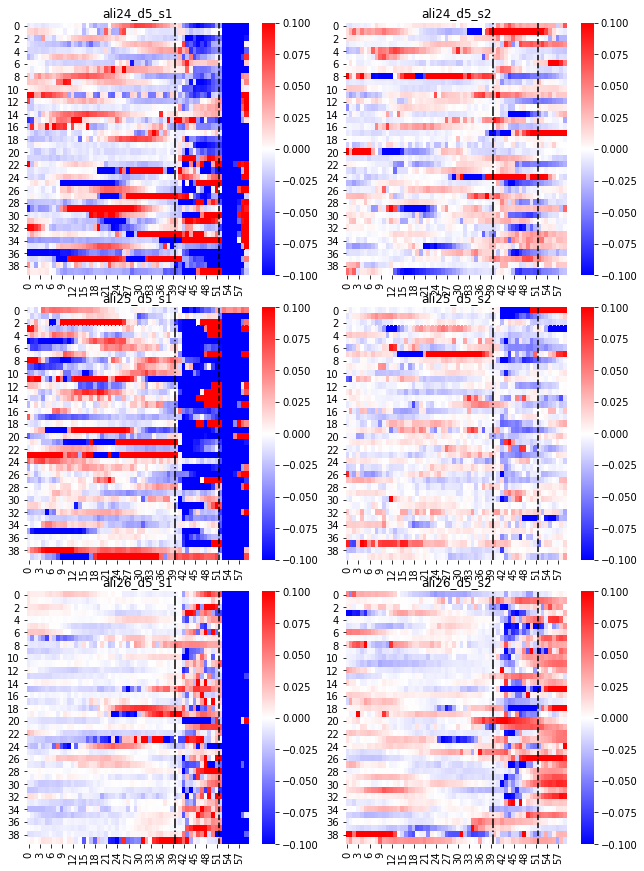

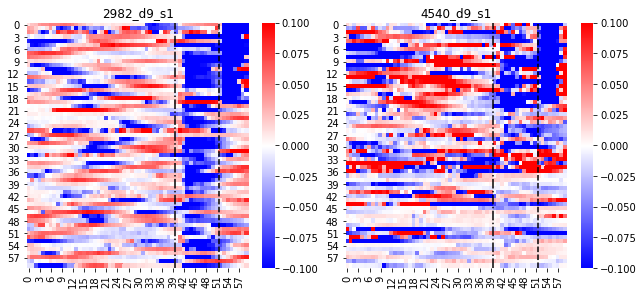

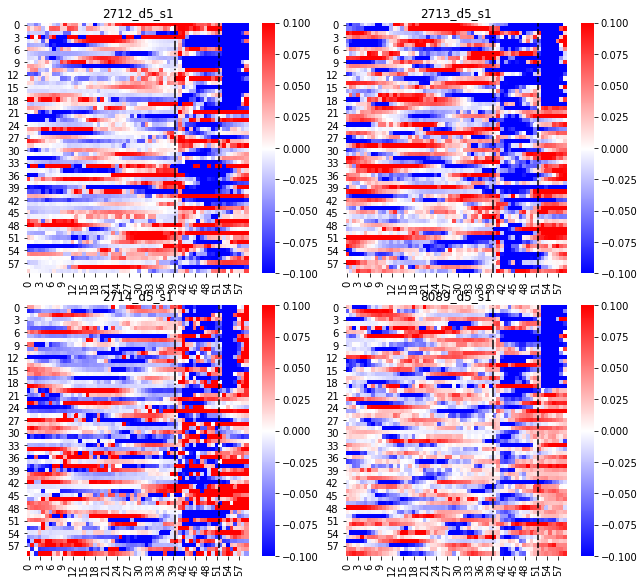

In [28]:
aliBehaviorScoring = binaryBehaviorScoring(aliEyeBlocks, aliEyeThresholds, 1)
rBehaviorScoring = binaryBehaviorScoring(rEyeBlocks, rEyeThresholds, 1)
nrBehaviorScoring = binaryBehaviorScoring(nrEyeBlocks, nrEyeThresholds, 1)

### Load traces to make hdf5 files 

In [29]:
def linear_func(x, a, b):
    return a*x + b

In [30]:
def curve_fit_wrapper(y, x, func):
    #Wrap curve_fit to match Pandas DataFrame Use and return only parameters, not covariance
    return curve_fit(func, x, y)[0]

In [31]:
def calcBaselineDistributions(df, regress_thresh=0.05, pct_datapoints=0.5):
    #Take DataFrame of traces, fit linear baseline, and calculate calcium threshold from devaition of residuals from that fit
    #Number of points for linear fit (Default is 0.5, or first half of sorted data)
    N_linfit = int(np.floor(df.shape[0]*pct_datapoints))
    #Calculate Distribution Fits and Generate Parameters and Outputs Matrix
    dist_series = df.apply(lambda x: ss.probplot(x)[0], axis=0)
    distributions = pd.DataFrame(data=[dist_series[item] for item in dist_series])
    #Rename Columns/Rows, since doesn't work at creation time for some reason...
    distributions.columns = ['Theoretical', 'Measured']
    distributions.index = dist_series.columns
    param_series = distributions.apply(lambda x: curve_fit(linear_func, x['Theoretical'][:N_linfit], x['Measured'][:N_linfit]), axis=1)
    distributions[['Parameters','Covariance']] = pd.DataFrame(data=[item for item in param_series], index=distributions.index, columns=['Parameters', 'Covariance'])
    distributions['Line'] = distributions.apply(lambda x: linear_func(x['Theoretical'], *x['Parameters']), axis=1)
    distributions['Difference'] = distributions.apply(lambda x: (x['Measured'] - x['Line']) / (np.nanmax(x['Measured']) - np.nanmin(x['Measured'])), axis=1)
    distributions['Deviation_idx'] = distributions.apply(lambda x: np.argmax(x['Difference'][N_linfit:] > regress_thresh)+N_linfit, axis=1)
    distributions['Ca_thresh'] = distributions.apply(lambda x: x['Measured'][x['Deviation_idx']], axis=1)
    
    return distributions

In [32]:
def scaleTraces(df):
    #Take DataFrame of traces, subtract off linear baseline and scale by percentage of maximum values for cell
    distribution_calculations = calcBaselineDistributions(df)
    #Get list of values into DataFrames/Series for scaling
    scale_vals = distribution_calculations.loc[:,('Parameters', 'Ca_thresh')].transpose(copy=True)
    baseline_list = []
    for row in scale_vals.loc['Parameters',:]:
        baseline_list.append(row[1])
    scale_vals.loc['Baseline',:] = pd.Series(baseline_list, index=scale_vals.columns)
    scale_vals.loc['Unit_Val',:] = scale_vals.loc['Ca_thresh',:] - scale_vals.loc['Baseline',:]
    #Adjust by subtracting baseline and dividing by scaling unit
    scaled_df = (df - scale_vals.loc['Baseline',:]) / scale_vals.loc['Unit_Val',:]
    
    return scaled_df

In [33]:
def loadTraces(files, whichData):
    #Load all the trace data and normalize traces with baseline adjustments
    #Load and doughnut subtract traces
    rawTraces = loadFiles(files, 'trace', whichData=whichData, multiIndex=True)
    BGTraces = loadFiles(files, 'BG10trace', whichData=whichData, multiIndex=True)
    traces = rawTraces.subtract(BGTraces)
    #Adjust Baseline Calculations
    scaled_traces= scaleTraces(traces)
    #Load Color Info TODO: Add Loading Color Values to loadFiles
    #colors = loadFiles(files, 'color', whichData)
    
    return scaled_traces

In [34]:
aliTraces = loadTraces(aliFiles, 'Ali')
rTraces = loadTraces(rFiles, 'Rebecca')
nrTraces = loadTraces(nrFiles, 'Rebecca')

###  Convert to hdf5 files for Rebecca's mice to run event detection

In [35]:
# Convert to hdf5 files - r mice
traces= nrTraces['2713_d5_s1']
f1 = h5py.File("traces_2713_n.h5", "w")
dset1 = f1.create_dataset("/traces", data=traces)
list(f1.keys())
f1.close()

## Function to make trial blocks

In [36]:
def findPulses(inputTrace):
    #Find location of onset and offset of pulses
    #inputTrace = 1-D Numpy Array Trace of values assumed to be similar to a train of ttl pulses, where there is a clear onset and offset for each pulse.
    #locationTrace = Pseudo-logical 1-D trace, with 1s at pulse onset, and -1s at pulse offset, and 0s everywhere else
    
    shiftedInput = inputTrace - inputTrace.mean() #Shift to have mean 0 and baseline below 0
    changes = np.sign(shiftedInput) #Find where sign changes
    locationTrace = np.zeros(inputTrace.shape); #Initialize Output
    #locationTrace = np.zeros((behav_df.shape[0]+1,behav_df.shape[1]))
    diffArray = np.diff(changes)
    locationTrace[np.insert(diffArray==2,0,0)] = 1 #Set onsets to 1
    locationTrace[np.insert(diffArray==-2,0,0)] = -1 #Set offsets to -1
    return locationTrace

In [37]:
def makeTraceTrialBlocks(trace_df, behav_df):
    #Make Blocks of Trials for Traces (with MultiIndex), and return df with those trial blocks removed
    #Pre-defined Values
    tot_block_time = 201 #201 timepoints is about 10 seconds
    before_sound_time = 40 #40 timepoints before the puff 2 seconds
    after_sound_time = tot_block_time - before_sound_time - 1 #Time after sound.  Subtract 1 as index between before sound and after sound is included as "spot"
    #Shorten behav_df to length of trace_df
    behav_length = behav_df.shape[0]
    trace_length = trace_df.shape[0]
    if behav_length > trace_length:
        behav_df = behav_df.loc[:(trace_length-1),:]
    #Initialize Lists
    trace_blocks=[]
    trace_noBlocks=[]
    for mouse, cell_df in trace_df.groupby(level='mouse', axis=1):
        print(mouse) #Output Tracking
        #Shape Behavior Data
        soundPulses = findPulses(behav_df.loc[:,mouse])
        sound_on_inds = behav_df.index[soundPulses == 1]
        if sound_on_inds[-1]+after_sound_time > trace_df.loc[:,mouse].shape[0]: #Get rid of last pulse on at end of recording
            sound_on_inds = sound_on_inds[:-1]
        #Setup Numpy Arrays for Faster Loops
        cur_block = np.zeros((tot_block_time, sound_on_inds.shape[0], cell_df.shape[1]))
        cur_noBlock = cell_df.copy()
        cur_blockDrop = []
        for trial_idx, spot in enumerate(sound_on_inds):
            cur_block[:, trial_idx, :] = cell_df.loc[(spot-before_sound_time):(spot+after_sound_time), :].values
            cur_blockDrop.append(range((spot-before_sound_time), (spot+after_sound_time)))
        #Drop Indexes from Current Values and Save Dataframe
        flat_blockDrop = [value for sublist in cur_blockDrop for value in sublist]
        trace_noBlocks.append(cur_noBlock.drop(flat_blockDrop).reset_index(drop=True))
        #Make DataFrame for Current Cell Case
        mIdx = pd.MultiIndex.from_product([[mouse], range(sound_on_inds.shape[0]), range(cell_df.shape[1])], names=['mouse', 'trial', 'cell_num'])
        cur_df = pd.DataFrame(data=cur_block.reshape(tot_block_time,-1), columns=mIdx)
        trace_blocks.append(cur_df)
    #Convert Lists into Concatenated DataFrame
    trace_noBlocks_df = pd.concat(trace_noBlocks, axis=1)
    trace_blocks_df = pd.concat(trace_blocks, axis=1)
    trace_blocks_df.index.name = 'Time'
    return trace_blocks_df, trace_noBlocks_df

## Function to match cells

In [38]:
def loadMatchedIndexes(files):
    #Function to load matched cell indexes and output them in a DataFrame
    allInds=[]
    for f in files:
        name = f.split('/')[-2]
        if ('d5' in name):
            f_open = h5py.File(f,'r')
            mIdx = pd.MultiIndex.from_tuples([(name,'lastTraining')], names=['mouse','session'])
            cellIndexes = pd.DataFrame(data=np.array(f_open['lastTraining_d5_s1_index']), columns=mIdx)
            cellIndexes[name,'firstExtinction'] = np.array(f_open['firstExtinction_d5_s2_index'])
            allInds.append(cellIndexes)
    return pd.concat(allInds, axis=1)

In [39]:
def matchDF(traces, match_df):
    #Function to compare match values in a dataframe and output only those matched in appropriate sessions
    #Includes re-sorting to ensure column match at cell-level
    mice = traces.columns.unique('mouse')
    matchedInds=[]
    for mouse in mice:
        print(mouse)
        if ('d5' in mouse): #If a d5 Session with Matching
            match_sess = match_df[mouse].dropna()
            if ('s1' in mouse):
                search_col = 'firstExtinction'
                sel_col = 'lastTraining'
                sel_inds = (match_sess.loc[(match_sess[search_col] != -1), sel_col] - 1).values.astype(int)
                trace_sess = traces[mouse]
                out_sess = trace_sess.loc[:,sel_inds]
            elif ('s2' in mouse):
                search_col = 'lastTraining'
                sel_col = 'firstExtinction'
                #Number Magic because Pandas Dataframes with MultiIndexing doesn't sort correctly... :(
                sel_inds_wrongSorting = (match_sess.loc[(match_sess[search_col] != -1), sel_col] - 1).values.astype(int)
                sel_inds_toSort = (match_sess.loc[(match_sess[search_col] != -1), search_col] - 1).values.astype(int)
                sorting_inds = np.argsort(sel_inds_toSort)
                sel_inds = sel_inds_wrongSorting[sorting_inds]
                #corr_sorting_multi_cols = pd.MultiIndex.from_product([sel_inds], names=['cell_num'])
                trace_sess = traces[mouse]
                out_sess = trace_sess.loc[:,sel_inds]
            mIdx = pd.MultiIndex.from_product([[mouse],range(sel_inds.shape[0])], names=['mouse','cell_num'])
            out_sess.columns = mIdx
            matchedInds.append(out_sess)
        else: #No d5 Session with Matching
            noChange = traces[mouse]
            noChange.columns = pd.MultiIndex.from_product([[mouse],noChange.columns], names=['mouse','cell_num'])
            matchedInds.append(noChange)
    return pd.concat(matchedInds, axis=1)

In [40]:
def matchCells(files, traces):
    #Function to cell index matches and output a DataFrame with those cell indexes matched
    #Load Matched Indexes
    matchInds = loadMatchedIndexes(files)
    
    #Match Indexes and Output
    matchedTraces = matchDF(traces, matchInds)
        
    return matchedTraces, matchInds

In [41]:
aliMatched, aliMatchInds = matchCells(aliFiles, aliTraces)

ali24_d5_s1
ali24_d5_s2
ali25_d5_s1
ali25_d5_s2
ali26_d5_s1
ali26_d5_s2


In [42]:
aliMatched['ali24_d5_s2']

cell_num,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,320
Time,,,,,,,,,,,,,,,,,,,,,
0,0.134247,2.560634,0.648526,-0.010525,1.263843,0.883854,-0.097179,0.050932,0.367342,0.271267,...,-0.432709,2.607987,0.818500,-0.457522,1.947966,-0.557557,-0.184207,-0.178068,-0.034590,-0.064788
1,0.026904,1.694838,0.614711,0.001805,1.029390,0.720393,-0.139837,0.516313,0.213910,0.496811,...,-0.731785,2.447858,0.924479,-0.392479,1.999042,-0.528550,-0.107367,0.020739,0.044920,0.043649
2,0.118428,1.894202,0.782734,0.315057,0.699401,0.763207,-0.207204,0.333901,0.311776,0.512857,...,-0.373491,2.577815,0.820217,-0.075433,1.889641,-0.635769,-0.271914,-0.073472,-0.064119,-0.019100
3,-0.007620,1.474720,0.369188,0.119869,0.355084,0.629528,-0.238108,-0.110650,-0.087634,0.324159,...,-0.220021,2.115447,0.773415,-0.061379,1.423951,-0.461160,-0.188779,-0.015428,-0.053141,-0.062171
4,0.352272,2.110743,0.501358,0.196372,0.612778,0.781227,-0.111757,-0.188460,0.473016,0.436990,...,-0.062958,2.089172,0.797337,0.273510,1.135293,-0.469409,-0.267668,0.294436,0.016269,-0.171535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,-0.234812,2.832761,0.319006,0.232698,0.549048,-0.474531,-0.207775,-0.566180,-0.408151,0.273293,...,0.621530,-1.219931,-0.815103,-0.873928,-1.389977,0.313987,-0.038933,0.486957,0.062265,2.504184
26478,-0.153354,2.853344,0.204058,0.146408,0.665331,-0.794330,-0.278018,-0.207080,-0.317338,0.187191,...,0.649858,-1.545909,-0.850827,-1.125449,-1.444812,0.296799,-0.153601,0.178629,0.166806,2.284881
26479,-0.138794,3.008380,0.341852,0.214725,0.622193,-0.896566,-0.272724,-0.376924,-0.300546,0.171462,...,0.548290,-1.455468,-0.894209,-0.782700,-1.263288,0.275779,-0.117846,0.323920,0.150866,2.460256


## Loading binary traces after event detection ( event onsets as 1)

In [199]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [5], [1,2])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [9], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [5], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d5_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d5_s2/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d5_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d5_s2/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d5_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d5_s2/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d9_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d9_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d5_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/To

In [200]:
def loadbinaryTraces(files, whichData):
    #Load all the trace data and normalize traces with baseline adjustments
    #Load and doughnut subtract traces
    binTraces = loadFiles(files, 'onset_binary_trace', whichData=whichData, multiIndex=True)
    
    return binTraces

In [201]:
ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

#### Check

In [202]:
np.unique(ali_binary_traces['ali24_d5_s2'])

array([0., 1.])

In [203]:
ali_binary_traces['ali24_d5_s2']

cell_num,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,320
Time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Make trial blocks

In [204]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(ali_binary_traces, aliSounds)
#bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(aliMatched, aliSounds)
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d5_s1
ali24_d5_s2
ali25_d5_s1
ali25_d5_s2
ali26_d5_s1
ali26_d5_s2
Rebecca Binary Blocks
2982_d9_s1
4540_d9_s1
New Rebecca Binary Blocks
2712_d5_s1
2713_d5_s1
2714_d5_s1
8089_d5_s1


In [205]:
print(bin_aliTraceBlocks['ali24_d5_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali25_d5_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali26_d5_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['2982_d9_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['4540_d9_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2712_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2713_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2714_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['8089_d5_s1'].columns.unique('cell_num').shape)

(321,)
(200,)
(437,)
(329,)
(341,)
(186,)
(170,)
(243,)
(105,)


In [206]:
bin_aliTraceBlocks['ali24_d5_s1']

trial      0                                                ...   39       \
cell_num  0    1    2    3    4    5    6    7    8    9    ...  311  312   
Time                                                        ...             
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
196       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
197       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
198       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
199       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
200       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

trial                                             
cell_num  313  314  315  316  317  318  319  320  
Time                                              
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2         0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
196       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
197       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
198       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
199       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
200       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[201 rows x 12840 columns]

In [207]:
n_events_lastday=np.sum(np.sum(bin_aliTraceNoBlocks['ali24_d5_s1']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali25_d5_s1']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali26_d5_s1']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali24_d5_s2']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali25_d5_s2']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali26_d5_s2']))+np.sum(np.sum(bin_rTraceNoBlocks['2982_d9_s1']))+np.sum(np.sum(bin_rTraceNoBlocks['4540_d9_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2712_d5_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2713_d5_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2714_d5_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['8089_d5_s1']))
n_events_lastday

104183.0

In [51]:
# Make a function to output p and its mean 
def baseline_firing_rate(mouse_df):
    cells = mouse_df.columns.unique('cell_num')
    Ncells = cells.shape[0]
    out= np.zeros((Ncells,1))
    for cell in cells:
        out[cell]=np.array(np.where(mouse_df.loc[:,cell]==1)).size
    # Time in seconds    
    t= mouse_df.shape[0]/20  
    p=out/t*20
    return p,np.mean(p)

In [52]:
def plot_prob_histogram(data):
    n_bins= np.arange(min(data), max(data)+0.5, 0.2)
    plt.hist(data,n_bins,align='left')
    plt.xlabel('Number of baseline events')
    plt.ylabel('Number of cells')
    plt.title('Baseline firing rate')
    plt.xticks(np.arange(min(data),max(data)+0.5,0.5))

0.5483486332243446
0.31807939023936493


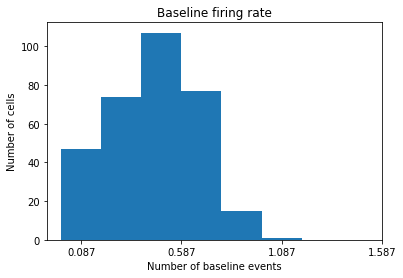

In [53]:
p,mean_firing_rate_ali24_CS=baseline_firing_rate(bin_aliTraceNoBlocks['ali24_d5_s1'])
print(mean_firing_rate_ali24_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.519896263468944
0.3008344474047015


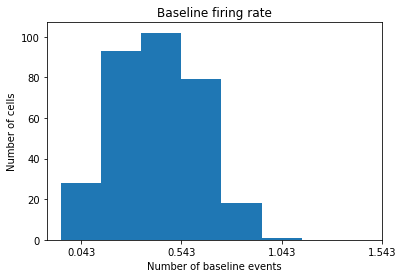

In [54]:
p,mean_firing_rate_ali24=baseline_firing_rate(bin_aliTraceNoBlocks['ali24_d5_s2'])
print(mean_firing_rate_ali24)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.3568877827074992
0.29275256063609995


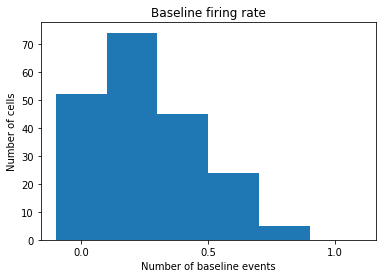

In [55]:
p,mean_firing_rate_ali25_CS=baseline_firing_rate(bin_aliTraceNoBlocks['ali25_d5_s1'])
print(mean_firing_rate_ali25_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.6474974599567097
0.40932634715066607


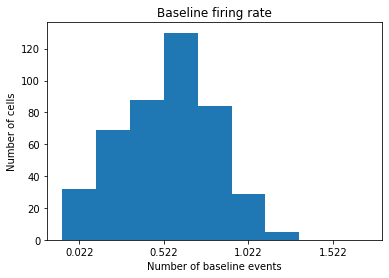

In [56]:
p,mean_firing_rate_ali26_CS=baseline_firing_rate(bin_aliTraceNoBlocks['ali26_d5_s1'])
print(mean_firing_rate_ali26_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.5594473611494888
0.5052874898219994


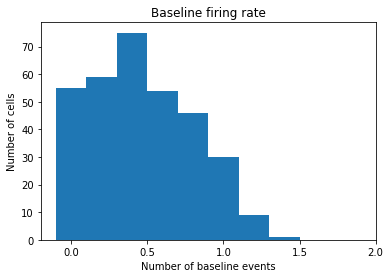

In [57]:
p,mean_firing_rate_2982_CS=baseline_firing_rate(bin_rTraceNoBlocks['2982_d9_s1'])
print(mean_firing_rate_2982_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.5078965609170888
0.3107999379142329


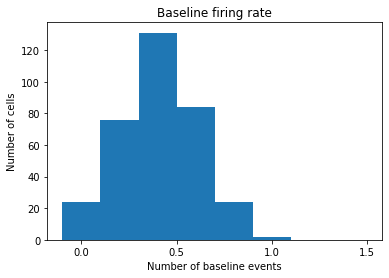

In [58]:
p,mean_firing_rate_4540_CS=baseline_firing_rate(bin_rTraceNoBlocks['4540_d9_s1'])
print(mean_firing_rate_4540_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.8028444436102661
0.34162975551101477


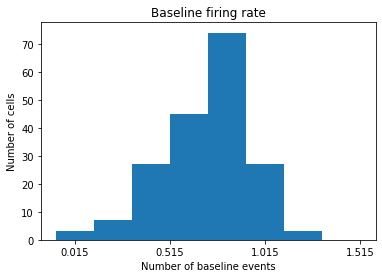

In [59]:
p,mean_firing_rate_2712_CS=baseline_firing_rate(bin_nrTraceNoBlocks['2712_d5_s1'])
print(mean_firing_rate_2712_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.7230209440771108
0.35519228501045697


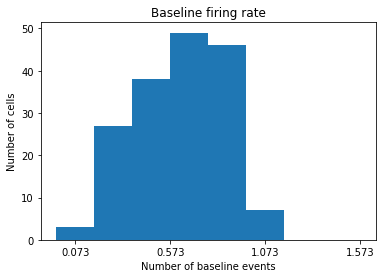

In [60]:
p,mean_firing_rate_2713_CS=baseline_firing_rate(bin_nrTraceNoBlocks['2713_d5_s1'])
print(mean_firing_rate_2713_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.4486508076537613
0.2665663560807462


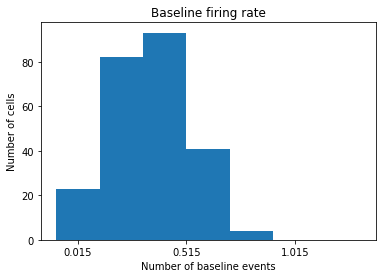

In [61]:
p,mean_firing_rate_2714_CS=baseline_firing_rate(bin_nrTraceNoBlocks['2714_d5_s1'])
print(mean_firing_rate_2714_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.6652363116234531
0.248870561422956


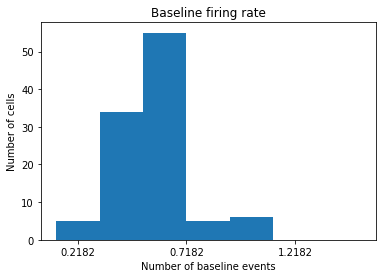

In [62]:
p,mean_firing_rate_8089_CS=baseline_firing_rate(bin_nrTraceNoBlocks['8089_d5_s1'])
print(mean_firing_rate_8089_CS)
print(1.5*np.std(p))
plot_prob_histogram(p)

## First training session 

### Loading binary traces for first sessions 

In [208]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces.h5'
                   
    return directories, filenames

In [209]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces.h5'
    return directories, filenames

In [210]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [2], [1])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [1], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712,2713,2714,8089], [1], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d2_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2713/2713_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2714/2714_d1_s1/binary_traces.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/8089/8089_d1_s1/binary_traces.h5']


In [211]:
first_ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
first_r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
first_nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

In [212]:
first_ali_binary_traces

mouse    ali24_d2_s1                                               ...  \
cell_num         0    1    2    3    4    5    6    7    8    9    ...   
Time                                                               ...   
0                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
26477            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
26478            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
26479            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
26480            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
26481            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

mouse    ali26_d2_s1                                               
cell_num         746  747  748  749  750  751  752  753  754  755  
Time                                                               
0                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
26477            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
26478            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
26479            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
26480            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
26481            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[26482 rows x 2379 columns]

In [213]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(first_ali_binary_traces, aliSounds)
#bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(aliMatched, aliSounds)
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(first_r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(first_nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d2_s1
ali25_d2_s1
ali26_d2_s1
Rebecca Binary Blocks
2982_d1_s1
4540_d1_s1
New Rebecca Binary Blocks
2712_d1_s1
2713_d1_s1
2714_d1_s1
8089_d1_s1


In [214]:
print(bin_aliTraceBlocks['ali24_d2_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali25_d2_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali26_d2_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['2982_d1_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['4540_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2712_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2713_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2714_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['8089_d1_s1'].columns.unique('cell_num').shape)

(862,)
(761,)
(756,)
(115,)
(187,)
(113,)
(143,)
(234,)
(70,)


In [215]:
n_events_firstday=np.sum(np.sum(bin_aliTraceNoBlocks['ali24_d2_s1']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali25_d2_s1']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali26_d2_s1']))+np.sum(np.sum(bin_rTraceNoBlocks['2982_d1_s1']))+np.sum(np.sum(bin_rTraceNoBlocks['4540_d1_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2712_d1_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2713_d1_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2714_d1_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['8089_d1_s1']))
n_events_firstday

79320.0

0.4292632123912624
0.2623381718765102


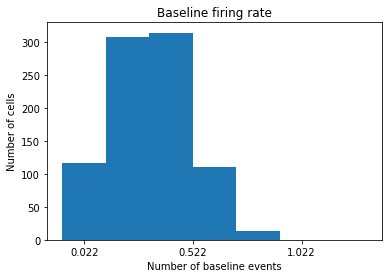

In [174]:
p,mean_firing_rate_ali24_FS=baseline_firing_rate(bin_aliTraceNoBlocks['ali24_d2_s1'])
print(mean_firing_rate_ali24_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.3720777583644619
0.2191603358132384


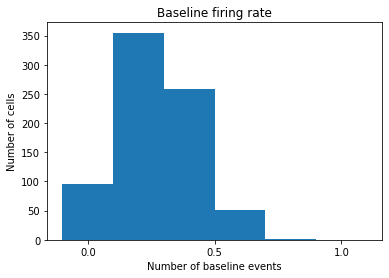

In [93]:
p,mean_firing_rate_ali25_FS=baseline_firing_rate(bin_aliTraceNoBlocks['ali25_d2_s1'])
print(mean_firing_rate_ali25_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.4156196018548578
0.30518112423134447


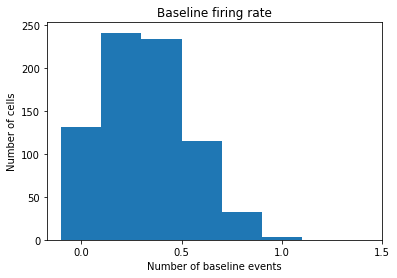

In [94]:
p,mean_firing_rate_ali26_FS=baseline_firing_rate(bin_aliTraceNoBlocks['ali26_d2_s1'])
print(mean_firing_rate_ali26_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.583209486166008
0.3861046232276966


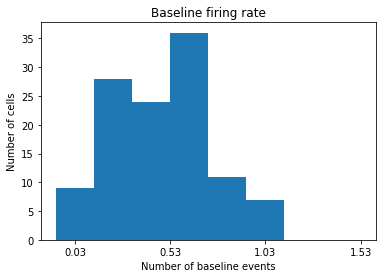

In [95]:
p,mean_firing_rate_2982_FS=baseline_firing_rate(bin_rTraceNoBlocks['2982_d1_s1'])
print(mean_firing_rate_2982_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.5892075838599903
0.32040926747720927


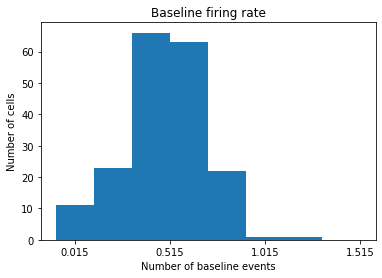

In [96]:
p,mean_firing_rate_4540_FS=baseline_firing_rate(bin_rTraceNoBlocks['4540_d1_s1'])
print(mean_firing_rate_4540_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.8371020410396258
0.3143561348250756


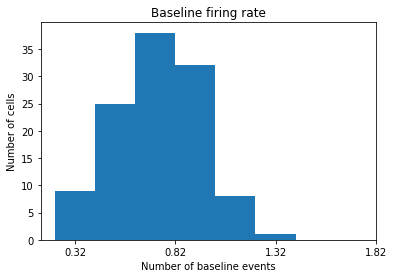

In [97]:
p,mean_firing_rate_2712_FS=baseline_firing_rate(bin_nrTraceNoBlocks['2712_d1_s1'])
print(mean_firing_rate_2712_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.6284271748470446
0.31297574643720216


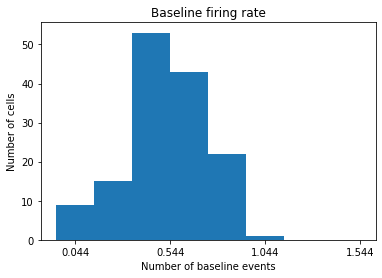

In [98]:
p,mean_firing_rate_2713_FS=baseline_firing_rate(bin_nrTraceNoBlocks['2713_d1_s1'])
print(mean_firing_rate_2713_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.40461455785649386
0.32646647687355607


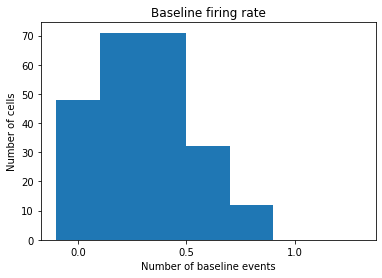

In [99]:
p,mean_firing_rate_2714_FS=baseline_firing_rate(bin_nrTraceNoBlocks['2714_d1_s1'])
print(mean_firing_rate_2714_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.6745180344220308
0.22905237421158683


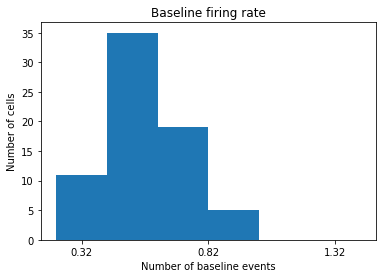

In [100]:
p,mean_firing_rate_8089_FS=baseline_firing_rate(bin_nrTraceNoBlocks['8089_d1_s1'])
print(mean_firing_rate_8089_FS)
print(1.5*np.std(p))
plot_prob_histogram(p)

## Day before extinction

In [216]:
def makeAliFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'trace_matched_final_BinaryVideo.hdf5'
                   
    return directories, filenames

In [217]:
def makeRebeccaFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'trace_final_BinaryVideo.hdf5'
    return directories, filenames

In [218]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces_final.h5'
                   
    return directories, filenames

In [219]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces_final.h5'
    return directories, filenames

In [220]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [4], [1,2])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [8], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [4], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d4_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d4_s2/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d4_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d4_s2/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d4_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d4_s2/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d8_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d8_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d4_s1/binary_traces_final.h5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/To

In [221]:
ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

In [222]:
#Initialize Input Values
#Ali Mice
aliBase = '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [4], [1,2])
aliFolders, aliFilenames = makeAliFilenames(aliMice, aliDays, aliSessions)
aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'

rMice, rDays, rSessions = ([2982,4540], [8], [1])
rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mic_
nrBase = '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [4], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
allFiles = aliFiles + rFiles + nrFiles
print(allFiles)

['/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d4_s1/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d4_s2/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d4_s1/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d4_s2/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d4_s1/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d4_s2/trace_matched_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d8_s1/trace_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d8_s1/trace_final_BinaryVideo.hdf5', '/home/hanlabadmins/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d4_

In [223]:
aliSounds = loadFiles(aliFiles, 'binSounds', whichData='Ali')
rSounds = loadFiles(rFiles, 'binSounds', whichData='Rebecca')
nrSounds = loadFiles(nrFiles, 'binSounds', whichData='Rebecca', fixedSize=39500)
sound_traces = pd.concat([aliSounds,rSounds,nrSounds], axis=1)
#sound_traces = pd.concat([rSounds,nrSounds], axis=1)

In [224]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(ali_binary_traces, aliSounds) 
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d4_s1
ali24_d4_s2
ali25_d4_s1
ali25_d4_s2
ali26_d4_s1
ali26_d4_s2
Rebecca Binary Blocks
2982_d8_s1
4540_d8_s1
New Rebecca Binary Blocks
2712_d4_s1
2713_d4_s1
2714_d4_s1
8089_d4_s1


In [225]:
n_events_lateday=np.sum(np.sum(bin_aliTraceNoBlocks['ali24_d4_s1']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali25_d4_s1']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali26_d4_s1']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali24_d4_s2']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali25_d4_s2']))+np.sum(np.sum(bin_aliTraceNoBlocks['ali26_d4_s2']))+np.sum(np.sum(bin_rTraceNoBlocks['2982_d8_s1']))+np.sum(np.sum(bin_rTraceNoBlocks['4540_d8_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2712_d4_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2713_d4_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['2714_d4_s1']))+np.sum(np.sum(bin_nrTraceNoBlocks['8089_d4_s1']))
n_events_lateday

113833.0

## Baseline firing rate

0.46340540171724665
0.3443132904875368


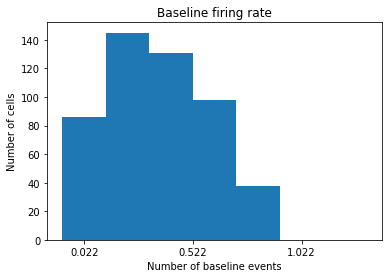

In [110]:
p,mean_firing_rate_ali24_DB=baseline_firing_rate(bin_aliTraceNoBlocks['ali24_d4_s1'])
print(mean_firing_rate_ali24_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.3552232994435681
0.3280642139323471


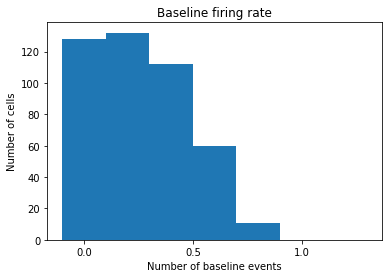

In [111]:
p,mean_firing_rate_ali25_DB=baseline_firing_rate(bin_aliTraceNoBlocks['ali25_d4_s1'])
print(mean_firing_rate_ali25_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.5888124895808047
0.3504081879973942


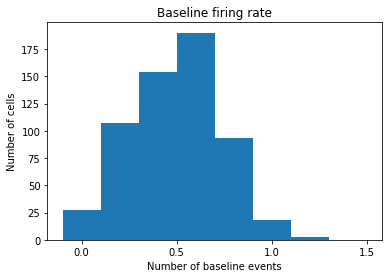

In [112]:
p,mean_firing_rate_ali26_DB=baseline_firing_rate(bin_aliTraceNoBlocks['ali26_d4_s1'])
print(mean_firing_rate_ali26_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.6111495116453795
0.48890838764187233


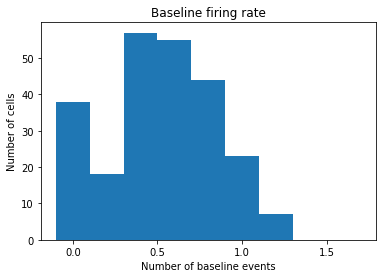

In [113]:
p,mean_firing_rate_2982_DB=baseline_firing_rate(bin_rTraceNoBlocks['2982_d8_s1'])
print(mean_firing_rate_2982_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.5296147919876734
0.31050783077817146


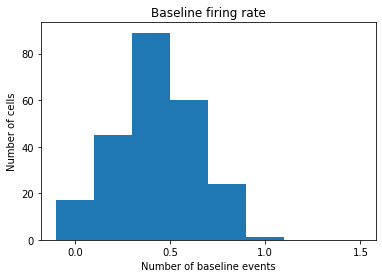

In [114]:
p,mean_firing_rate_4540_DB=baseline_firing_rate(bin_rTraceNoBlocks['4540_d8_s1'])
print(mean_firing_rate_4540_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.7900748663101604
0.36902009216227943


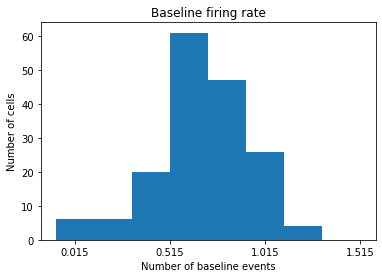

In [115]:
p,mean_firing_rate_2712_DB=baseline_firing_rate(bin_nrTraceNoBlocks['2712_d4_s1'])
print(mean_firing_rate_2712_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.7033981191222571
0.3391274959301994


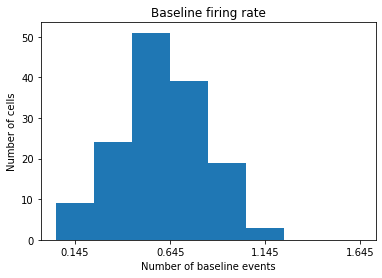

In [116]:
p,mean_firing_rate_2713_DB=baseline_firing_rate(bin_nrTraceNoBlocks['2713_d4_s1'])
print(mean_firing_rate_2713_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.44217008797653956
0.2875195934527317


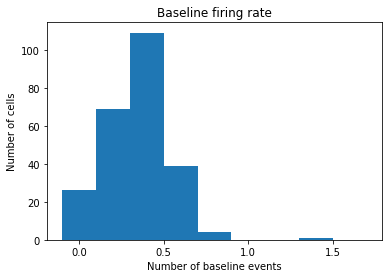

In [117]:
p,mean_firing_rate_2714_DB=baseline_firing_rate(bin_nrTraceNoBlocks['2714_d4_s1'])
print(mean_firing_rate_2714_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

0.6967511177347244
0.30947000653062384


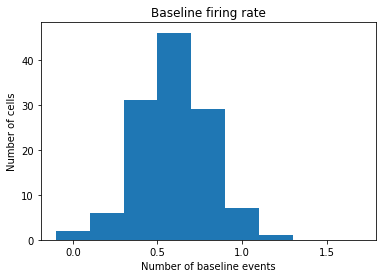

In [118]:
p,mean_firing_rate_8089_DB=baseline_firing_rate(bin_nrTraceNoBlocks['8089_d4_s1'])
print(mean_firing_rate_8089_DB)
print(1.5*np.std(p))
plot_prob_histogram(p)

## Overall baseline firing rate

In [122]:
mean_firing_24=np.mean([mean_firing_rate_ali24_FS,mean_firing_rate_ali24_CS,mean_firing_rate_ali24_DB])
mean_firing_25=np.mean([mean_firing_rate_ali25_FS,mean_firing_rate_ali25_CS,mean_firing_rate_ali25_DB])
mean_firing_26=np.mean([mean_firing_rate_ali26_FS,mean_firing_rate_ali26_CS,mean_firing_rate_ali26_DB])


In [123]:
mean_firing_2982=np.mean([mean_firing_rate_2982_FS,mean_firing_rate_2982_CS,mean_firing_rate_2982_DB])
mean_firing_4540=np.mean([mean_firing_rate_4540_FS,mean_firing_rate_4540_CS,mean_firing_rate_4540_DB])

In [124]:
mean_firing_2712=np.mean([mean_firing_rate_2712_FS,mean_firing_rate_2712_CS,mean_firing_rate_2712_DB])
mean_firing_2713=np.mean([mean_firing_rate_2713_FS,mean_firing_rate_2713_CS,mean_firing_rate_2713_DB])
mean_firing_2714=np.mean([mean_firing_rate_2714_FS,mean_firing_rate_2714_CS,mean_firing_rate_2714_DB])
mean_firing_8089=np.mean([mean_firing_rate_8089_FS,mean_firing_rate_8089_CS,mean_firing_rate_8089_DB])


In [125]:
baseline_firing_rate_list= [mean_firing_24,mean_firing_25,mean_firing_26,mean_firing_2982,mean_firing_4540,mean_firing_2712,mean_firing_2713,mean_firing_2714,mean_firing_8089]

In [126]:
## To find event rate/min 
multiplied_list = [element * 3 for element in baseline_firing_rate_list]
multiplied_list

[1.4410172473328537,
 1.0841888405155293,
 1.6519295513923722,
 1.753806358960876,
 1.6267189367647523,
 2.430021350960052,
 2.0548462380464123,
 1.2954354534867947,
 2.0365054637802085]

In [127]:
mean_baseline_firing_rate = np.mean(multiplied_list)

In [128]:
mean_baseline_firing_rate

1.7082743823599837

In [129]:
np.std(multiplied_list)

0.3932783426501954

In [131]:
1.71/60

0.0285

In [226]:
## NUmber of events!! 

n_events_firstday+n_events_lateday+n_events_lastday

297336.0